In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import random

sns.set(style="darkgrid")


In [3]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, pred):
    
    y_test_legit = y_test.value_counts()[0]
    y_test_fraud = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)

    fig = plt.figure(figsize=(10,5))
    ax = sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

In [4]:
df = pd.read_csv('data/creditcard.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,164703.0,2.020237,-0.243044,-0.483283,0.265925,-0.374214,-0.336445,-0.495288,-0.009989,1.162893,...,-0.153927,-0.352640,0.396445,0.617117,-0.405524,-0.643912,0.029467,-0.024899,1.18,0
1,127580.0,-0.620611,0.194223,-0.577333,-2.535395,1.178285,5.154054,-3.403006,-4.220080,-0.782919,...,-2.204771,1.821735,0.496156,0.679349,-1.222257,-0.326171,-0.001889,-0.041871,20.88,0
2,19991.0,-0.436269,1.888773,-2.887259,1.945192,0.434991,-1.662936,0.244851,0.520208,0.955806,...,-0.297703,-0.590753,0.083831,-0.530596,-0.365911,-0.397159,0.191195,-0.196675,89.99,0
3,69221.0,-0.936472,-0.741492,1.158675,-1.153602,0.222437,-0.739389,-0.082655,0.188970,-1.606748,...,-0.205064,-0.556905,0.185990,-0.014143,-0.337723,0.980770,-0.023966,0.100356,60.00,0
4,156632.0,-1.064986,1.976888,-1.465989,-0.091098,-0.205300,-0.200311,-1.917819,-4.818336,-0.733667,...,-2.129326,1.779171,0.325031,-0.081215,-0.589771,-0.205559,-0.089812,0.098544,2.49,0


In [5]:
df.shape

(284807, 31)

[None]

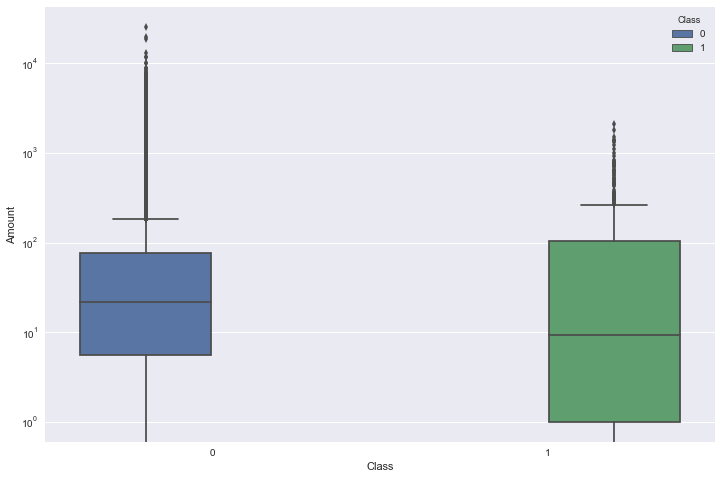

In [6]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Class", y="Amount", hue="Class", data=df)
ax.set(yscale="log")

In [7]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]

print('Fraud Cases: ', len(fraud))
print('Non-Fraud Cases: ', len(non_fraud))

Fraud Cases:  492
Non-Fraud Cases:  284315


In [8]:
X = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
X_train.shape

(199364, 30)

### **Logistic Regression**

In [10]:
log_reg = LogisticRegression(C=1e5)
log_reg.fit(X_train, y_train)

print('Score: ', log_reg.score(X_test, y_test))

Score:  0.9990754069964772


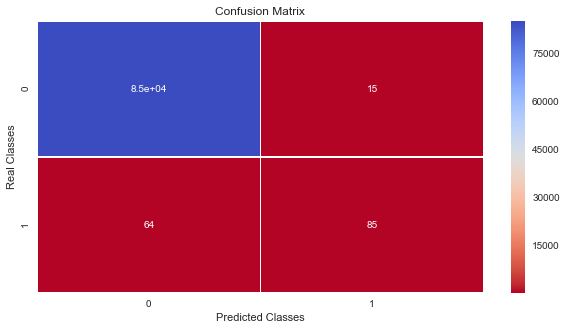

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85294
          1       0.85      0.57      0.68       149

avg / total       1.00      1.00      1.00     85443



In [11]:
y_pred = log_reg.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

### **Support Vector Machine**

In [12]:
lsvm = svm.LinearSVC(C=1.0, dual=False)
lsvm.fit(X_train, y_train)

print('Score: ', lsvm.score(X_test, y_test))

Score:  0.9988413328183702


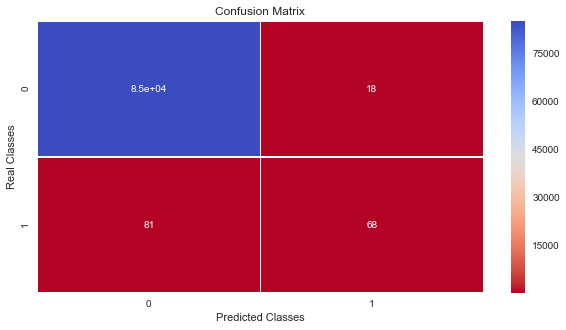

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85294
          1       0.79      0.46      0.58       149

avg / total       1.00      1.00      1.00     85443



In [13]:
y_pred = lsvm.predict(X_test)
plot_confusion_matrix(y_test, y_pred)